<a href="https://colab.research.google.com/github/rajviishah/Real-Estate-Investment/blob/main/Clustering-Techniques/GMM-AggolomerativeClustering-Rajvi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cluster with GMM and one Other Algorithm**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from google.colab import drive

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/257/clean_train.csv")
dataset.head(10)

,Unnamed: 0,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,HasBsmt,MSZoning_C (all),MSZoning_FV,MSZoning_RH,...,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,1,60,8450,7,5,2003,2003,706,0,150,6.752270,856,854,0,7.444249,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,12.247694,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1,2,20,9600,6,8,1976,1976,978,0,284,7.140453,1262,0,0,7.140453,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,12.109011,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,2,3,60,11250,7,5,2001,2002,486,0,434,6.824374,920,866,0,7.487734,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,12.317167,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,3,4,70,9550,7,5,1915,1970,216,0,540,6.628041,961,756,0,7.448334,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,11.849398,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,4,5,60,14260,8,5,2000,2000,655,0,490,7.043160,1145,1053,0,7.695303,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,12.429216,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
5,5,6,50,14115,5,5,1993,1995,732,0,64,6.679599,796,566,0,7.216709,1,0,1,1,1,1,5,0,2,480,40,30,0,320,0,0,700,10,2009,11.870600,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
6,6,7,20,10084,8,5,2004,2005,1369,0,317,7.430114,1694,0,0,7.434848,1,0,2,0,3,1,7,1,2,636,255,57,0,0,0,0,0,8,2007,12.634603,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
7,7,8,60,10382,7,6,1973,1973,859,32,216,7.009409,1107,983,0,7.644919,1,0,2,1,3,1,7,2,2,484,235,204,228,0,0,0,350,11,2009,12.206073,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
8,8,9,50,6120,7,5,1931,1950,0,0,952,6.858565,1022,752,0,7.480992,0,0,2,0,2,2,8,2,2,468,90,0,205,0,0,0,0,4,2008,11.774520,1,0,0,0,...,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
9,9,10,190,7420,5,6,1939,1950,851,0,140,6.898715,1077,0,0,6.981935,1,0,1,0,2,2,5,2,1,205,0,4,0,0,0,0,0,1,2008,11.678440,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
dataset = dataset.drop(['Unnamed: 0'], axis=1)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1457 entries, 0 to 1456
Columns: 222 entries, Id to SaleCondition_Partial
dtypes: float64(3), int64(219)
memory usage: 2.5 MB


# **Applying Gaussian Mixture Model Algorithm**

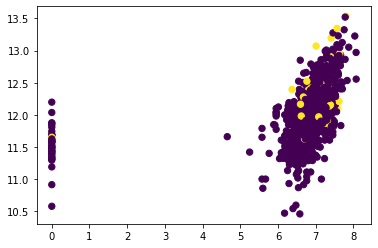

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components = 3).fit(dataset)
labels = gmm.predict(dataset)
plt.scatter(dataset["TotalBsmtSF"], dataset["SalePrice"], c=labels, s=40, cmap='viridis')

# **Applying kMean Algorithm**

In [ ]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1, 15):
    kmeans=KMeans(n_clusters = i)
    kmeans.fit(dataset)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Let's visualise for k = 3

In [ ]:
kmeans = KMeans(n_clusters = 3)
y_predicted = kmeans.fit_predict(dataset)
y_predicted

Reducing the dimensions of the data set using PCA.

In [ ]:
from sklearn.decomposition import PCA

scaler =  StandardScaler()
scaler.fit(dataset)
scaled_data = scaler.transform(dataset)

pca = PCA(n_components = 2)
transformed_data = pca.fit_transform(scaled_data)

We can see that for 2 components only 25% of the variance is covered and we lose a lot of features.

In [ ]:
pca = PCA(n_components = 10)
transformed_data = pca.fit_transform(scaled_data)
np.cumsum(pca.explained_variance_ratio_ * 100)

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=y_predicted)
plt.xlabel('PCA Feaure 1')
plt.ylabel('PCA Feature 2')

# **Applying Aggolomerative Clustering Algorithm**

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
clustering = AgglomerativeClustering(n_clusters = 3).fit(dataset)

In [ ]:
plt.scatter(dataset["TotalBsmtSF"], dataset["SalePrice"], c=labels, s=40, cmap='viridis')

# **Applying MeanShift Clustering**

In [ ]:
from sklearn.cluster import MeanShift

In [ ]:
clustering = MeanShift(bandwidth=2).fit(dataset)

In [ ]:
plt.scatter(dataset["TotalBsmtSF"], dataset["SalePrice"], c=labels, s=40, cmap='viridis')